In [2]:
from estimark.scf import scf_data, scf_weights, scf_groups, scf_mapping, age_groups
from estimark.estimation import get_targeted_moments
from estimark.parameters import initial_age, final_age_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
scf_mapping

[array([1, 2, 3, 4, 5]),
 array([ 6,  7,  8,  9, 10]),
 array([11, 12, 13, 14, 15]),
 array([16, 17, 18, 19, 20]),
 array([21, 22, 23, 24, 25]),
 array([26, 27, 28, 29, 30]),
 array([31, 32, 33, 34, 35]),
 array([36, 37, 38, 39, 40]),
 array([41, 42, 43, 44, 45]),
 array([46, 47, 48, 49, 50]),
 array([51, 52, 53, 54, 55]),
 array([56, 57, 58, 59, 60]),
 array([61, 62, 63, 64, 65]),
 array([66, 67, 68, 69, 70])]

In [4]:
moments = get_targeted_moments(
    data=scf_data, weights=scf_weights, groups=scf_groups, mapping=scf_mapping
)

In [5]:
moments

array([ 0.29000955,  0.5073554 ,  0.96998024,  1.68121164,  2.61141247,
        3.60656934,  5.09250782,  6.36786927,  8.02774989,  8.88843243,
        9.814142  , 10.01214925, 10.27526811, 10.3959854 ])

In [6]:
# generate lables as (26,30], (31,35], literally
labels = [f"({age_groups[i][0]},{age_groups[i][-1]}]" for i in range(len(age_groups))]
labels

['(26,30]',
 '(31,35]',
 '(36,40]',
 '(41,45]',
 '(46,50]',
 '(51,55]',
 '(56,60]',
 '(61,65]',
 '(66,70]',
 '(71,75]',
 '(76,80]',
 '(81,85]',
 '(86,90]',
 '(91,95]']

([<matplotlib.axis.XTick at 0x1ca5b0fcf10>,
 [Text(0, 0, '(26,30]'),
  Text(1, 0, '(31,35]'),
  Text(2, 0, '(36,40]'),
  Text(3, 0, '(41,45]'),
  Text(4, 0, '(46,50]'),
  Text(5, 0, '(51,55]'),
  Text(6, 0, '(56,60]'),
  Text(7, 0, '(61,65]'),
  Text(8, 0, '(66,70]'),
  Text(9, 0, '(71,75]'),
  Text(10, 0, '(76,80]'),
  Text(11, 0, '(81,85]'),
  Text(12, 0, '(86,90]'),
  Text(13, 0, '(91,95]')])

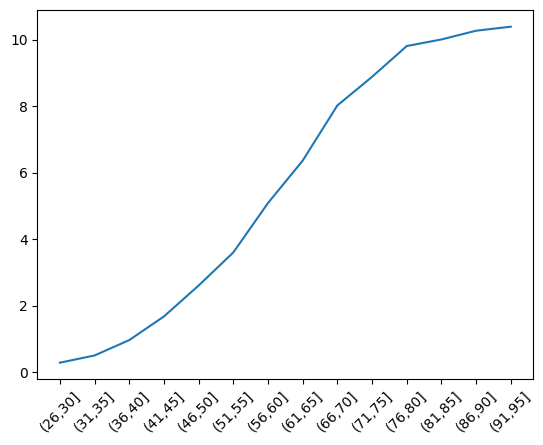

In [7]:
plt.plot(moments)
plt.xticks(range(len(moments)), labels, rotation=45)

In [8]:
snp = pd.read_excel("data/S&P Target Date glidepath.xlsx")

In [9]:
# create snp.age_groups in bins of 5 years, so that it matches the age_groups
# code nans as 0
bins = range(initial_age, final_age_data + 1, 5)
snp["age_groups"] = pd.cut(
    snp["Current Age"], bins=bins, labels=np.arange(1, len(bins))
)

In [10]:
share_moments = get_targeted_moments(
    data=snp["S&P Target Date Equity allocation"].to_numpy(),
    weights=np.ones(len(snp)),
    groups=snp["age_groups"].to_numpy(),
    mapping=scf_mapping,
)

In [11]:
len(share_moments)

14

([<matplotlib.axis.XTick at 0x1ca5b3515d0>,
 [Text(0, 0, '(26,30]'),
  Text(1, 0, '(31,35]'),
  Text(2, 0, '(36,40]'),
  Text(3, 0, '(41,45]'),
  Text(4, 0, '(46,50]'),
  Text(5, 0, '(51,55]'),
  Text(6, 0, '(56,60]'),
  Text(7, 0, '(61,65]'),
  Text(8, 0, '(66,70]'),
  Text(9, 0, '(71,75]'),
  Text(10, 0, '(76,80]'),
  Text(11, 0, '(81,85]'),
  Text(12, 0, '(86,90]'),
  Text(13, 0, '(91,95]')])

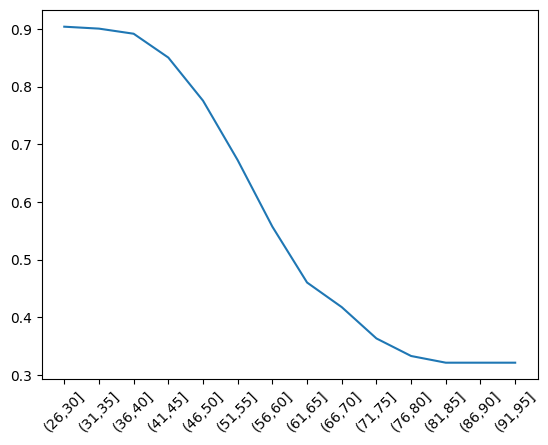

In [12]:
plt.plot(share_moments)
plt.xticks(range(len(moments)), labels, rotation=45)